In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('Iris.csv')

In [27]:
data = data.drop(columns=['Id'])

In [28]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='Species', ylabel='count'>

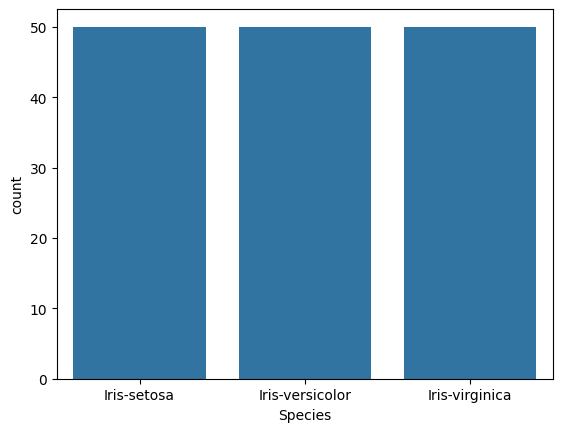

In [29]:
sns.barplot(data['Species'].value_counts())

In [30]:
df = data[data['Species'] != 'Iris-virginica']

In [31]:
X = df.drop(columns=['Species'])
y = df['Species']

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into training (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [33]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape,X_test.shape,y_test.shape)

(60, 4) (20, 4) (60,) (20,) (20, 4) (20,)


In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

In [35]:

# Create a random forest classifier
model = SVC()

# Define the range of parameters you want to tune
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

# Create a k-fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [36]:
svc = SVC(C=0.1,gamma=1,kernel='rbf')

In [37]:
svc.fit(X_train,y_train)

SVC(C=0.1, gamma=1)

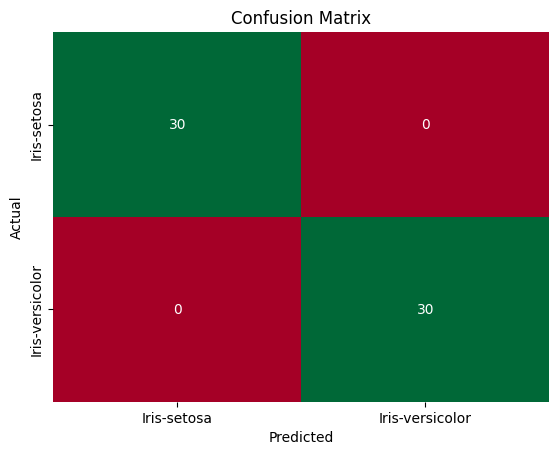

In [38]:
from sklearn.metrics import confusion_matrix

prediction = svc.predict(X_train)
cm = confusion_matrix(y_train, prediction)

labels = np.unique(y_train)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
TN, FP, FN, TP = cm.ravel()
accuracy = (TN + TP) / (TN + FP + FN + TP)
print("Accuracy Score =", format(accuracy))

Accuracy Score = 1.0


In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection using Cross validation

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [43]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), RandomForestClassifier()]

In [44]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X_train,y_train, cv=5)
    
    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')

In [45]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [1. 1. 1. 1. 1.]
Accuracy % of the  LogisticRegression(max_iter=1000) 100.0
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =   [1. 1. 1. 1. 1.]
Accuracy % of the  SVC(kernel='linear') 100.0
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [1. 1. 1. 1. 1.]
Accuracy % of the  RandomForestClassifier() 100.0
----------------------------------------------


In [46]:
def compare_models_cross_validation():

  for model in models:
    kf=KFold(n_splits=5)
    score=cross_val_score(model,X_train,y_train,cv=kf)
    print(model)
    print("Cross Validation Scores are {}".format(score))
    print("Average Cross Validation score :{}".format(score.mean()))
    print('----------------------------------------------')


In [47]:
compare_models_cross_validation()

LogisticRegression(max_iter=1000)
Cross Validation Scores are [1. 1. 1. 1. 1.]
Average Cross Validation score :1.0
----------------------------------------------
SVC(kernel='linear')
Cross Validation Scores are [1. 1. 1. 1. 1.]
Average Cross Validation score :1.0
----------------------------------------------
RandomForestClassifier()
Cross Validation Scores are [1. 1. 1. 1. 1.]
Average Cross Validation score :1.0
----------------------------------------------


### Plotting cross validation accuracy

In [54]:
svc_range = list(range(1, 6))
svc_scores = []
for sv in svc_range:
    svc = SVC(kernel='linear')
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    svc_scores.append(scores.mean())
print(svc_scores)


[1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Cross-Validated-Accuracy')

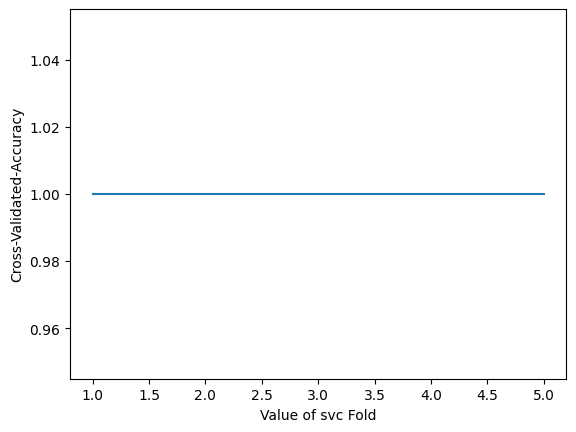

In [57]:
plt.plot(svc_range, svc_scores)
plt.xlabel('Value of svc Fold')
plt.ylabel('Cross-Validated-Accuracy')

Model Accuracy

Training Accuracy

Validation Accuracy

Training and Validation Accuracy